In [2]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv("RAIN_PREDICTION\weatherAUS.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'RAIN_PREDICTION\\weatherAUS.csv'

In [117]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [118]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [119]:
!pip install plotly matplotlib seaborn --quiet

In [120]:

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)



In [121]:
px.histogram(raw_df, x='Location', title='location vs Rainy Days', color='RainToday')

In [122]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [123]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [124]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.model_selection import train_test_split


train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

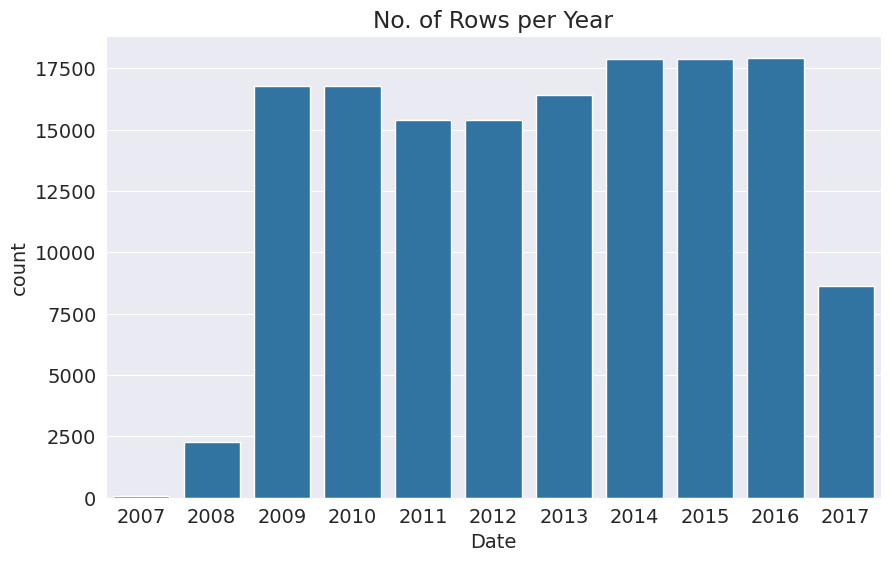

In [127]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [128]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [129]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (101018, 23)
val_df.shape : (17885, 23)
test_df.shape : (26557, 23)


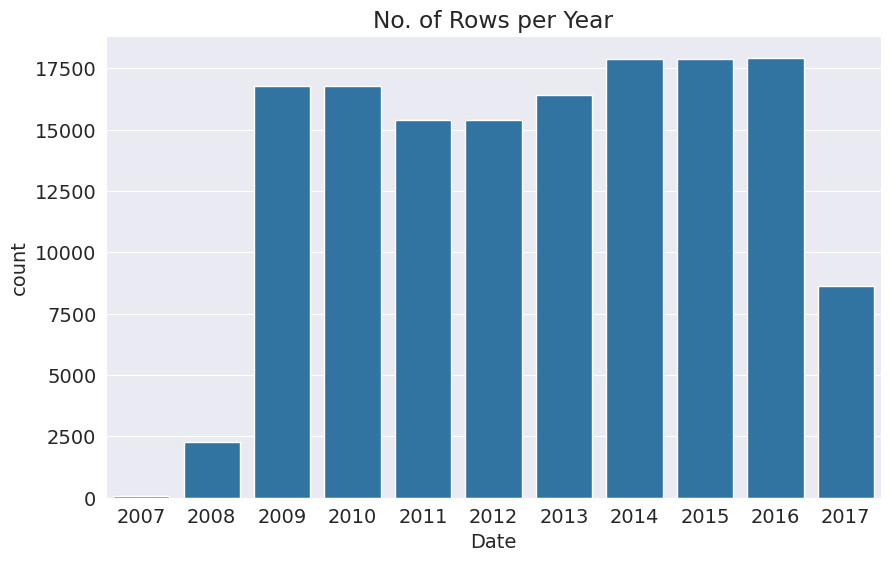

In [130]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [131]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [132]:
print(input_cols)
print(target_col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
RainTomorrow


In [133]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [134]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1              WNW           44.0        NNW        WSW           4.0   
2              WSW           46.0          W        WSW          19.0   
3               NE           24.0         SE          E          11.0   
4                W           41.0        ENE         NW           7.0   
...            ...            ...        ...        ...           ...   
144548         SSE           43.0        ESE        SSE          24.0   
144549          NE           31.0        ENE         SW          19.0   
144550         ESE           39.0        ESE        SSE          26.0   
144551         ESE           43.0        ESE        SSW          28.0   
144552         WNW           76.0        ENE        SSW          30.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
144548          26.0         22.0         13.0       1014.1       1009.8   
144549          20.0         16.0          8.0       1012.6       1007.6   
144550           9.0         15.0          8.0       1011.9       1008.0   
144551          17.0         22.0          9.0       1014.0       1009.2   
144552          13.0         16.0          9.0       1012.1       1006.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
0            8.0       NaN     16.9     21.8        No  
1            NaN       NaN     17.2     24.3        No  
2            NaN       2.0     21.0     23.2        No  
3            NaN       NaN     18.1     26.5        No  
4            7.0       8.0     17.8     29.7        No  
...          ...       ...      ...      ...       ...  
144548       NaN       NaN     23.7     31.8        No  
144549       NaN       NaN     28.9     34.8        No  
144550       NaN       NaN     29.7     35.7        No  
144551       NaN       NaN     29.8     37.2        No  
144552       NaN       NaN     30.1     37.4        No  

[101018 rows x 21 columns]

In [135]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 101018, dtype: object

In [136]:
!pip install numpy --quiet
import numpy as np

In [137]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [138]:
train_inputs[numeric_cols].describe()

MinTemp        MaxTemp     Rainfall   Evaporation      Sunshine  \
count  100282.000000  100484.000000  98987.00000  62532.000000  59010.000000   
mean       11.992238      22.981287      2.38158      5.282092      7.593952   
std         6.336489       6.994097      8.51861      3.949170      3.790480   
min        -8.500000      -4.100000      0.00000      0.000000      0.000000   
25%         7.500000      17.800000      0.00000      2.600000      4.800000   
50%        11.800000      22.400000      0.00000      4.600000      8.400000   
75%        16.600000      27.900000      0.80000      7.200000     10.600000   
max        33.900000      48.100000    371.00000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93395.000000  99564.000000  99556.000000  99428.000000  99514.000000   
mean       40.265892     14.127898     18.777813     68.694231     51.552445   
std        13.729898      9.008386      8.882133     18.981489     20.739573   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     20.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  91218.000000  91252.000000  63913.000000  62888.000000  99913.000000   
mean    1017.520623   1015.144023      4.316712      4.421559     16.812393   
std        7.075771      6.998990      2.867476      2.693835      6.393443   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.500000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

             Temp3pm  
count  100040.000000  
mean       21.506126  
std         6.832900  
min        -5.100000  
25%        16.500000  
50%        20.900000  
75%        26.100000  
max        46.100000

In [139]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [140]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')


In [141]:
existing_numeric_cols = [col for col in numeric_cols if col in raw_df.columns]
raw_df[existing_numeric_cols].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [142]:
train_inputs[numeric_cols].isna().sum()

MinTemp            736
MaxTemp            534
Rainfall          2031
Evaporation      38486
Sunshine         42008
WindGustSpeed     7623
WindSpeed9am      1454
WindSpeed3pm      1462
Humidity9am       1590
Humidity3pm       1504
Pressure9am       9800
Pressure3pm       9766
Cloud9am         37105
Cloud3pm         38130
Temp9am           1105
Temp3pm            978
dtype: int64

In [143]:
existing_cols = [col for col in numeric_cols if col in raw_df.columns]
imputer.fit(raw_df[existing_cols])


SimpleImputer()

In [144]:
list(imputer.statistics_)

[np.float64(12.19403438096892),
 np.float64(23.22134827564685),
 np.float64(2.3609181499166656),
 np.float64(5.468231522922462),
 np.float64(7.6111775206611565),
 np.float64(40.03523007167319),
 np.float64(14.043425914971502),
 np.float64(18.662656778887342),
 np.float64(68.88083133761887),
 np.float64(51.5391158755046),
 np.float64(1017.6499397983052),
 np.float64(1015.2558888309618),
 np.float64(4.4474612602152455),
 np.float64(4.509930082924903),
 np.float64(16.990631415587398),
 np.float64(21.68339031800974)]

In [145]:
# 1. Apply get_dummies on the entire raw dataset first
full_df_encoded = pd.get_dummies(raw_df, drop_first=True)

# 2. Split after encoding to ensure consistent columns
from sklearn.model_selection import train_test_split

train_inputs, temp_inputs = train_test_split(full_df_encoded, test_size=0.3, random_state=42)
val_inputs, test_inputs = train_test_split(temp_inputs, test_size=0.5, random_state=42)

# 3. Define numeric columns
numeric_cols = full_df_encoded.select_dtypes(include='number').columns.tolist()

# 4. Fit the imputer on training set only
imputer.fit(train_inputs[numeric_cols])

# 5. Transform all splits with same columns
train_inputs[numeric_cols] = pd.DataFrame(
    imputer.transform(train_inputs[numeric_cols]),
    columns=numeric_cols,
    index=train_inputs.index
)

val_inputs[numeric_cols] = pd.DataFrame(
    imputer.transform(val_inputs[numeric_cols]),
    columns=numeric_cols,
    index=val_inputs.index
)

test_inputs[numeric_cols] = pd.DataFrame(
    imputer.transform(test_inputs[numeric_cols]),
    columns=numeric_cols,
    index=test_inputs.index
)


In [146]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [147]:
raw_df[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [148]:
from sklearn.preprocessing import MinMaxScaler
?MinMaxScaler
scaler = MinMaxScaler()

## New Section

In [149]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [150]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [151]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

In [152]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [153]:
train_inputs[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  101822.000000  101822.000000  101822.000000  101822.000000   
mean        0.487984       0.529602       0.006401       0.037651   
std         0.150210       0.133954       0.022656       0.021780   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.382075       0.431002       0.000000       0.027586   
50%         0.485849       0.519849       0.000000       0.037651   
75%         0.596698       0.623819       0.002695       0.037651   
max         0.952830       0.984877       1.000000       1.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  101822.000000  101822.000000  101822.000000  101822.000000   
mean        0.524160       0.263973       0.108078       0.214465   
std         0.188149       0.102108       0.068227       0.100329   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.524160       0.193798       0.053846       0.149425   
50%         0.524160       0.255814       0.100000       0.214465   
75%         0.593103       0.310078       0.146154       0.275862   
max         0.986207       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  101822.000000  101822.000000  101822.000000  101822.000000   
mean        0.689199       0.515369       0.613935       0.610393   
std         0.188269       0.204336       0.111570       0.106958   
min         0.000000       0.000000       0.000000       0.017600   
25%         0.570000       0.370000       0.545455       0.542400   
50%         0.690000       0.515369       0.613935       0.610393   
75%         0.830000       0.650000       0.682645       0.676800   
max         1.000000       1.000000       1.000000       1.000000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  101822.000000  101822.000000  101822.000000  101822.000000  
mean        0.494565       0.500846       0.510246       0.519821  
std         0.251907       0.232544       0.136036       0.131453  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.333333       0.444444       0.411392       0.424184  
50%         0.494565       0.500846       0.506329       0.514395  
75%         0.666667       0.666667       0.605485       0.608445  
max         0.888889       1.000000       1.000000       1.000000

In [154]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [155]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])
encoder.categories_


[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [156]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)


['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [157]:
# Step 1: Encode full dataset before splitting
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Step 2: Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=raw_df.index)

# Step 3: Drop original categorical columns and concat
raw_df_encoded = raw_df.drop(columns=categorical_cols)
full_df = pd.concat([raw_df_encoded, encoded_df], axis=1)

# Step 4: Now split full_df
from sklearn.model_selection import train_test_split
train_inputs, temp_inputs = train_test_split(full_df, test_size=0.3, random_state=42)
val_inputs, test_inputs = train_test_split(temp_inputs, test_size=0.5, random_state=42)


In [158]:
pd.set_option('display.max_columns', None)

In [159]:
test_inputs

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
93015   2016-10-04     14.3     25.1      23.2          NaN       NaN   
28729   2013-07-10      6.9     14.2       0.0          0.7       NaN   
104539  2014-09-07      4.1     20.6       0.0          4.8      11.0   
89834   2016-05-16     21.0     29.0       0.0          8.6       NaN   
86165   2014-08-26     12.8     23.9       0.0          4.0       9.1   
...            ...      ...      ...       ...          ...       ...   
8596    2016-03-21     12.4     27.1       0.0          6.8       NaN   
79645   2013-10-12      7.8     24.1       0.0          4.8      12.2   
34479   2011-09-17     14.5     23.9       0.0          5.8       9.6   
35195   2013-10-31     16.4     24.1       0.0          5.4       9.8   
59146   2011-10-01      3.9     13.3       4.2          NaN       NaN   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
93015            44.0          20.0          30.0         50.0         59.0   
28729            15.0           0.0           7.0         99.0         74.0   
104539           48.0          13.0          26.0         45.0         21.0   
89834            48.0          22.0          24.0         62.0         64.0   
86165            28.0           6.0           9.0         64.0         40.0   
...               ...           ...           ...          ...          ...   
8596             43.0          20.0          15.0         65.0         31.0   
79645            52.0          19.0          24.0         56.0         37.0   
34479            35.0          17.0          26.0         76.0         60.0   
35195            39.0          11.0          28.0         52.0         54.0   
59146            52.0          15.0          20.0         77.0         64.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
93015        1014.0       1010.7       NaN       NaN     19.2     21.8   
28729        1034.3       1031.7       NaN       NaN      9.4     13.7   
104539       1024.5       1019.2       0.0       2.0     14.5     20.2   
89834        1016.2       1013.2       NaN       NaN     26.0     28.4   
86165        1018.3       1014.3       1.0       1.0     18.4     23.7   
...             ...          ...       ...       ...      ...      ...   
8596         1014.1       1011.6       1.0       4.0     17.2     25.6   
79645        1012.9       1007.5       0.0       1.0     16.2     22.9   
34479        1017.6       1013.1       1.0       5.0     18.1     22.1   
35195        1021.9       1019.4       5.0       1.0     20.1     21.1   
59146        1006.8       1010.4       7.0       7.0     10.3     12.5   

       RainTomorrow  Location_Adelaide  Location_Albany  Location_Albury  \
93015            No                0.0              0.0              0.0   
28729            No                0.0              0.0              0.0   
104539           No                0.0              0.0              0.0   
89834           Yes                0.0              0.0              0.0   
86165            No                0.0              0.0              0.0   
...             ...                ...              ...              ...   
8596             No                0.0              0.0              0.0   
79645            No                0.0              0.0              0.0   
34479            No                0.0              0.0              0.0   
35195            No                0.0              0.0              0.0   
59146            No                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
93015                     0.0                     0.0                0.0   
28729                     0.0                     0.0                0.0   
104539                    0.0                     0.0                0.0   
89834                     0.0                     0.0                0.0   
86165 

In [160]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (101822, 121)
train_targets: (101018,)
val_inputs: (21819, 121)
val_targets: (17885,)
test_inputs: (21819, 121)
test_targets: (26557,)


In [161]:
!pip install pyarrow --quiet

In [162]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [163]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 34.7 ms, sys: 4.92 ms, total: 39.7 ms
Wall time: 40 ms


In [164]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 325 ms, sys: 97.6 ms, total: 423 ms
Wall time: 240 ms


In [165]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (101822, 121)
train_targets: (101018,)
val_inputs: (21819, 121)
val_targets: (17885,)
test_inputs: (21819, 121)
test_targets: (26557,)


In [166]:
val_inputs

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
143922  2013-04-10     14.9     31.8       0.0          NaN       NaN   
41782   2015-05-23     11.6     18.2       NaN          NaN       NaN   
115325  2010-12-07     13.9     24.6       0.6          NaN      11.9   
87351   2009-05-01     20.3     30.1       0.0          8.4      10.7   
89942   2016-09-01     21.2     29.2       0.0          5.8       NaN   
...            ...      ...      ...       ...          ...       ...   
48300   2015-07-04     -5.5      9.3       0.2          NaN       NaN   
138790  2016-08-09      9.6     29.3       0.0          4.8       NaN   
51098   2014-11-05      8.9     26.1       0.0          NaN       NaN   
28632   2013-04-04     15.1     20.6       4.8          0.6       NaN   
57149   2014-10-07      7.4     13.4       5.0          NaN       NaN   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
143922           52.0          15.0          22.0         30.0         16.0   
41782            57.0          13.0          19.0         89.0         75.0   
115325           44.0          22.0          22.0         66.0         47.0   
87351            50.0          20.0          31.0         59.0         45.0   
89942            39.0          26.0          26.0         66.0         59.0   
...               ...           ...           ...          ...          ...   
48300            19.0           2.0           4.0         94.0         56.0   
138790           37.0          20.0          19.0         19.0         15.0   
51098            44.0           2.0          22.0         63.0         27.0   
28632            28.0          15.0          11.0         99.0         96.0   
57149            67.0          22.0          26.0         98.0         87.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
143922       1019.8       1015.4       NaN       NaN     23.2     30.5   
41782        1028.3       1027.6       8.0       8.0     12.5     15.6   
115325       1006.7       1006.7       7.0       4.0     18.8     23.0   
87351        1015.9       1013.0       2.0       3.0     26.4     29.0   
89942        1017.8       1013.3       5.0       7.0     24.3     27.6   
...             ...          ...       ...       ...      ...      ...   
48300        1024.0       1022.3       NaN       NaN     -0.6      8.7   
138790       1018.2       1014.7       8.0       1.0     20.7     28.3   
51098        1015.4       1010.1       NaN       NaN     14.3     25.4   
28632        1028.4       1027.8       NaN       NaN     16.1     17.1   
57149        1012.5       1015.1       8.0       8.0      8.0      9.9   

       RainTomorrow  Location_Adelaide  Location_Albany  Location_Albury  \
143922           No                0.0              0.0              0.0   
41782           Yes                0.0              0.0              0.0   
115325           No                0.0              0.0              0.0   
87351            No                0.0              0.0              0.0   
89942          None                0.0              0.0              0.0   
...             ...                ...              ...              ...   
48300            No                0.0              0.0              0.0   
138790           No                0.0              0.0              0.0   
51098            No                0.0              0.0              0.0   
28632           Yes                0.0              0.0              0.0   
57149            No                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
143922                    0.0                     0.0                0.0   
41782                     0.0                     0.0                0.0   
115325                    0.0                     0.0                0.0   
87351                     0.0                     0.0                0.0   
89942 

In [167]:
val_targets.name = "RainTomorrow"
print(val_targets.head())
print(val_targets.dtype)


2133    No
2134    No
2135    No
2136    No
2137    No
Name: RainTomorrow, dtype: object
object


In [168]:
#train a logistic regression................

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Step 0: Drop rows where the target is missing
clean_df = raw_df.dropna(subset=["RainTomorrow"])

# Step 1: Define columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Step 2: Separate features and target
X = clean_df.drop(columns=["RainTomorrow"])
y = clean_df["RainTomorrow"]

# Step 3: One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(X[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=X.index)

# Step 4: Combine numeric + encoded features
X_numeric = X[numeric_cols]
X_final = pd.concat([X_numeric, encoded_df], axis=1)

# Step 5: Split the dataset
train_inputs, temp_inputs, train_targets, temp_targets = train_test_split(
    X_final, y, test_size=0.3, random_state=42)

val_inputs, test_inputs, val_targets, test_targets = train_test_split(
    temp_inputs, temp_targets, test_size=0.5, random_state=42)

# Step 6: Impute missing values
features = numeric_cols + encoded_cols
imputer = SimpleImputer(strategy='mean')

train_inputs[features] = pd.DataFrame(
    imputer.fit_transform(train_inputs[features]),
    columns=features,
    index=train_inputs.index
)

val_inputs[features] = pd.DataFrame(
    imputer.transform(val_inputs[features]),
    columns=features,
    index=val_inputs.index
)

test_inputs[features] = pd.DataFrame(
    imputer.transform(test_inputs[features]),
    columns=features,
    index=test_inputs.index
)

# Step 7: Drop NaNs in targets if any (extra safety)
train_targets = train_targets.dropna()
train_inputs = train_inputs.loc[train_targets.index]

# Step 8: Train the model
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[features], train_targets)


LogisticRegression(solver='liblinear')

In [170]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [171]:
print(model.coef_.tolist())

[[0.0314226616165729, -0.03922680666871376, 0.010416662645878011, 0.012725851081359645, -0.10515090841138192, 0.06048758842150127, -0.008794395434574434, -0.019702755696077125, 0.0030959061959936053, 0.05933999395973344, 0.15478779384963, -0.1620420659980802, 0.010709400747640312, 0.13368864197809815, 0.025041932622429687, 0.022583126600312187, 0.5072167792808051, -0.11295661827582897, 0.4338520859804709, -0.03513603679531201, 0.21597932056872937, -0.28626159750569774, 0.2164110673675761, 0.353077496696353, 0.0738959644440001, 0.15079636953618292, 0.15614127697199226, -0.012272792549779737, 0.21536105671346073, -0.42515035072961954, -0.2518616183973269, -0.19284798058278022, -0.1949003609256003, -0.08344464664257181, -0.06216676255600413, -0.39557572938092544, -0.052632737939339334, 0.04867103026522539, 0.04357310375696048, -0.7286015826390626, -0.19195015092388265, -0.005980173641523995, -0.5105299143799155, -0.3279341641112335, 0.02656685199067634, 0.24669432987876297, 0.379867006375

In [172]:
print(model.intercept_)

[0.10593588]


In [173]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [174]:
train_preds = model.predict(X_train)

In [175]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [176]:
train_targets

121033     No
19096      No
131019     No
115337    Yes
111104     No
         ... 
112920    Yes
122810     No
106280     No
135107    Yes
124925     No
Name: RainTomorrow, Length: 99535, dtype: object

In [177]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.99207507, 0.00792493],
       [0.95778291, 0.04221709],
       [0.9564954 , 0.0435046 ],
       ...,
       [0.99525616, 0.00474384],
       [0.77068876, 0.22931124],
       [0.93480719, 0.06519281]])

In [178]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8470688702466469

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.9456357 , 0.0543643 ],
       [0.49328919, 0.50671081]])

In [181]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 84.71%


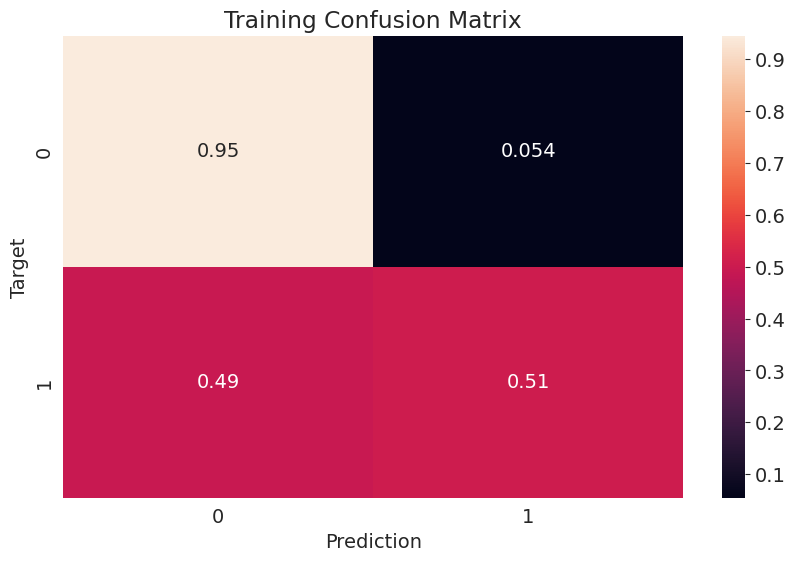

In [182]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 84.91%


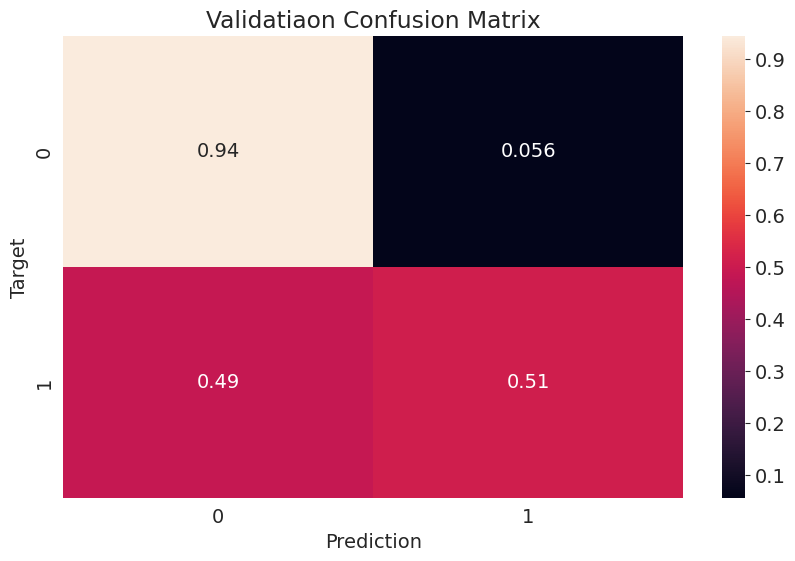

In [183]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.37%


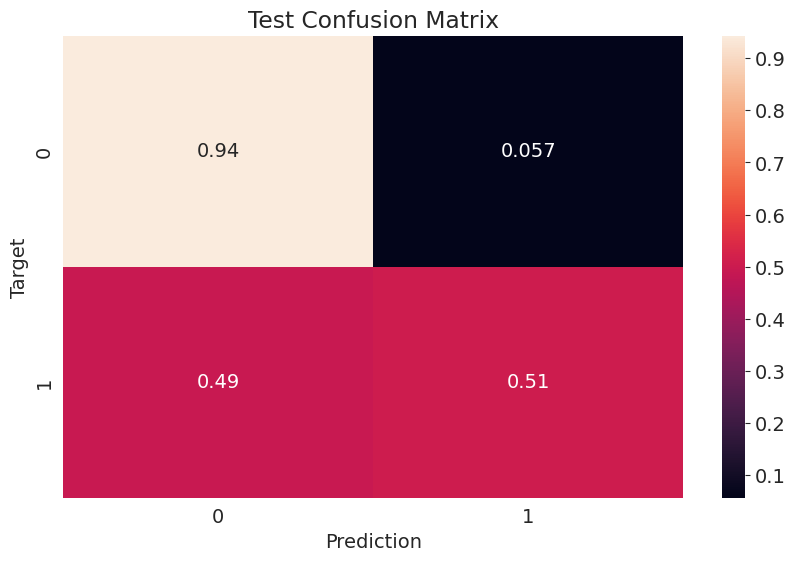

In [184]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [185]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

def all_no(inputs):
    return np.full(len(inputs), "No")

In [186]:
accuracy_score(test_targets, random_guess(X_test))

0.49533498991982744

In [187]:
accuracy_score(test_targets, all_no(X_test))

0.7734539828402645